FRAUDDETECTPRO - DATA PREPARATION

📂 Loading raw data...
   Raw shape: (284807, 31)
   Features: 30
   Target: Class
\n📋 Sample data (first 5 rows):


,Time,V1,V2,V3,V4,V5,V6,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.502292,0.219422,0.215153,69.99,0



📊 Checking for missing values...
   ✓ No missing values found!


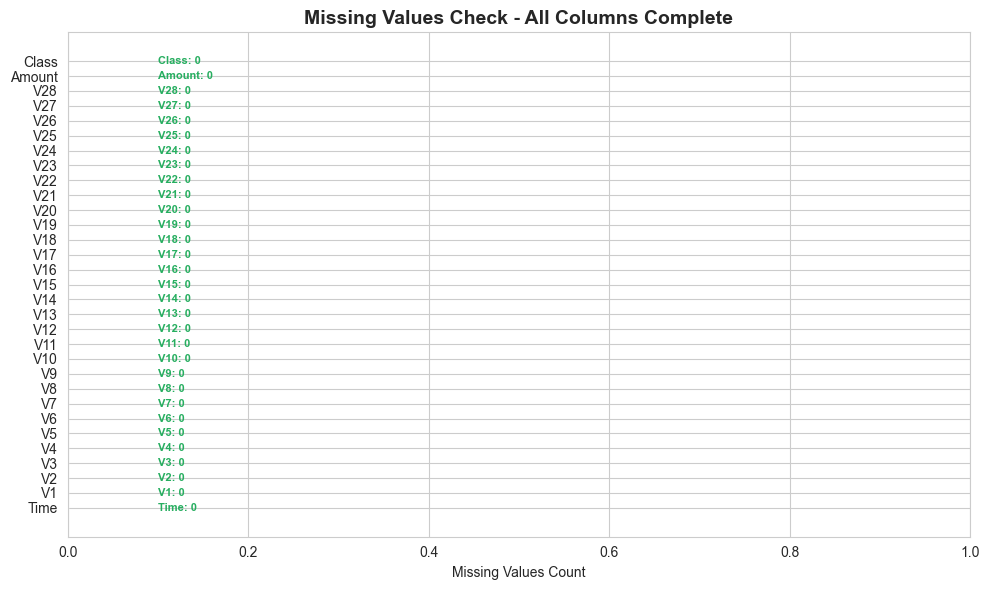


📊 Dataset info:
   Features shape: (284807, 30)
   Target shape: (284807,)
   Class distribution: [284315    492]
   Fraud ratio: 0.1727%

⚙️  Scaling features...
   ✓ Features scaled using StandardScaler

📊 Visualizing feature scaling effect...


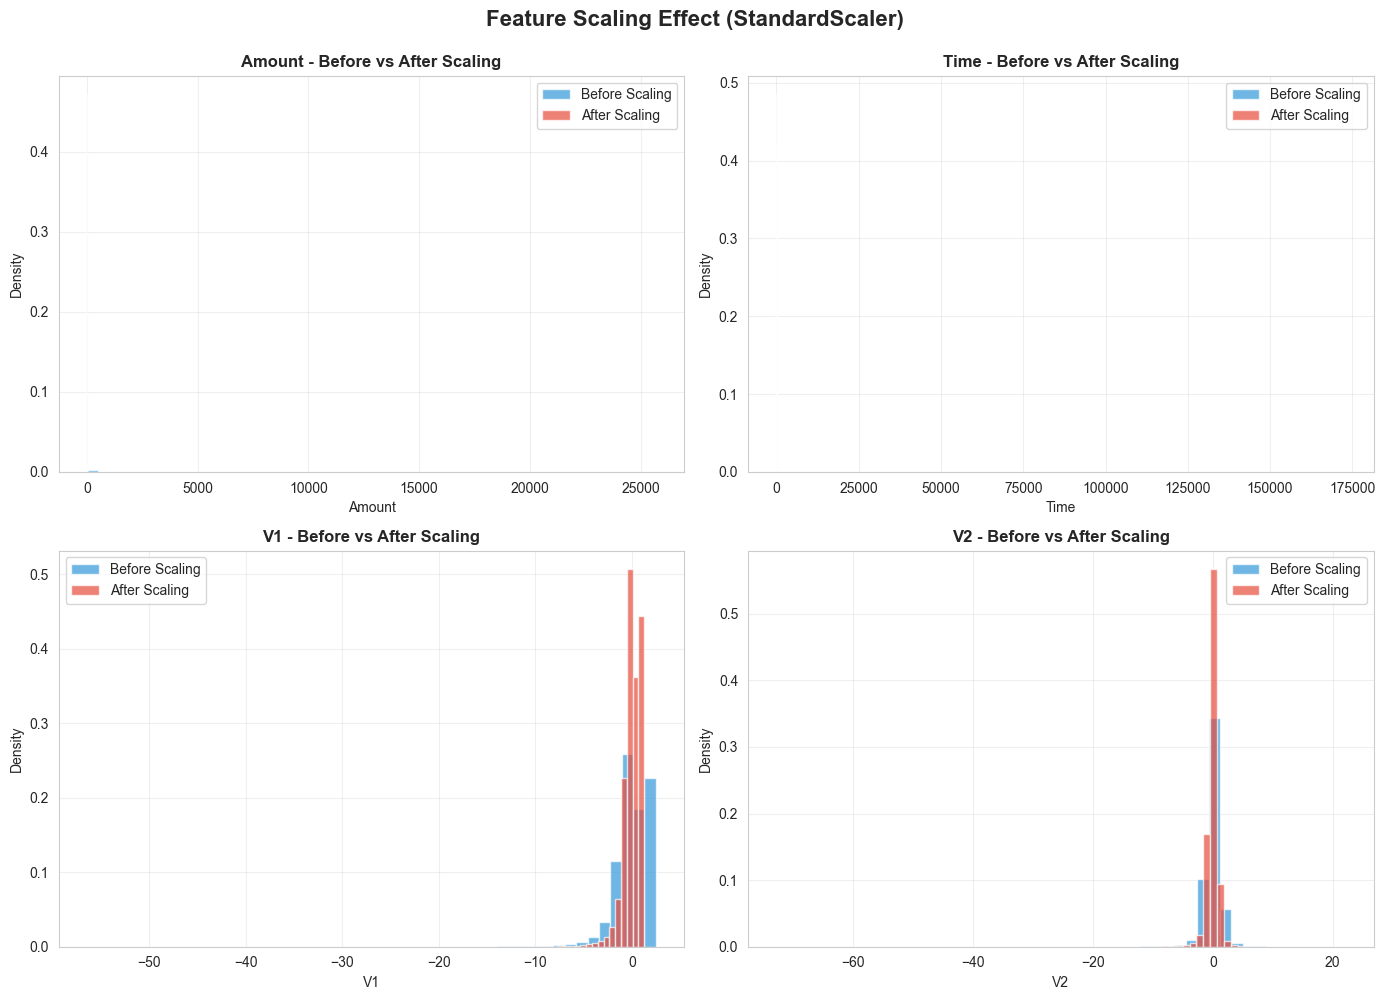


🔀 Splitting data...
   Train shape: (227845, 30), (227845,)
   Test shape:  (56962, 30), (56962,)
   Train fraud ratio: 0.1729%
   Test fraud ratio:  0.1720%

📊 Visualizing train-test split...


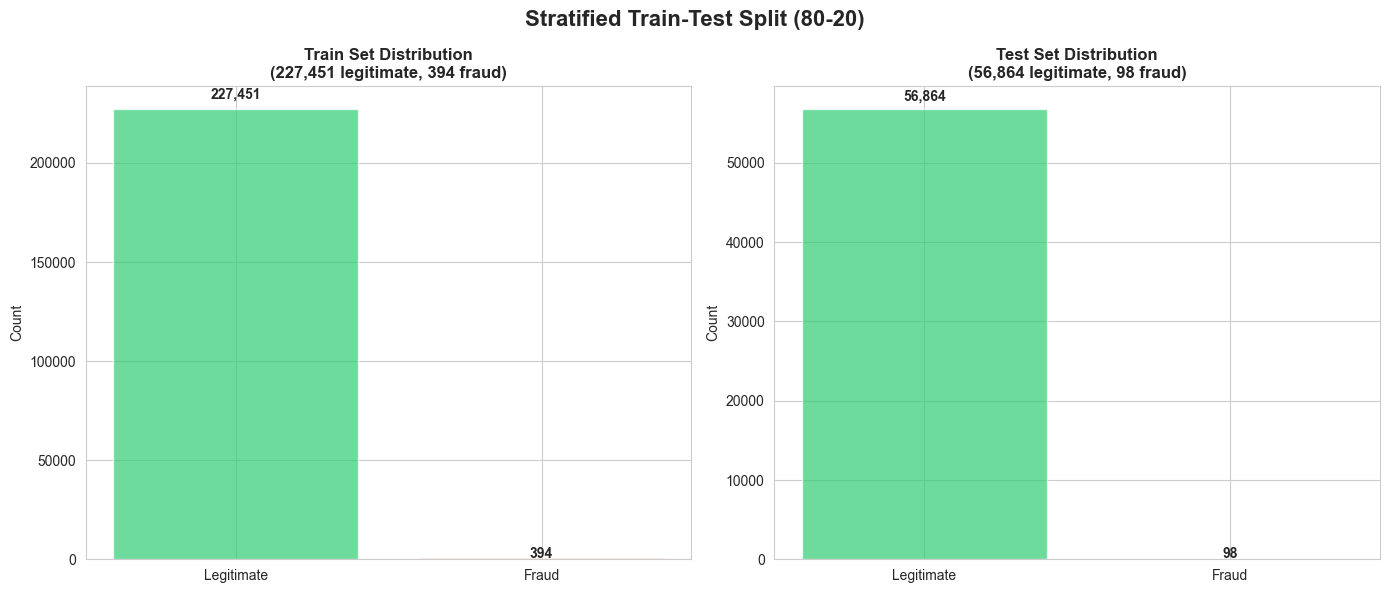


🔄 Applying SMOTE...
   Before SMOTE: [227451    394]
   After SMOTE:  [227451 227451]
   New fraud ratio: 50.00%
   ✓ Dataset balanced!

📊 Visualizing SMOTE balancing effect...


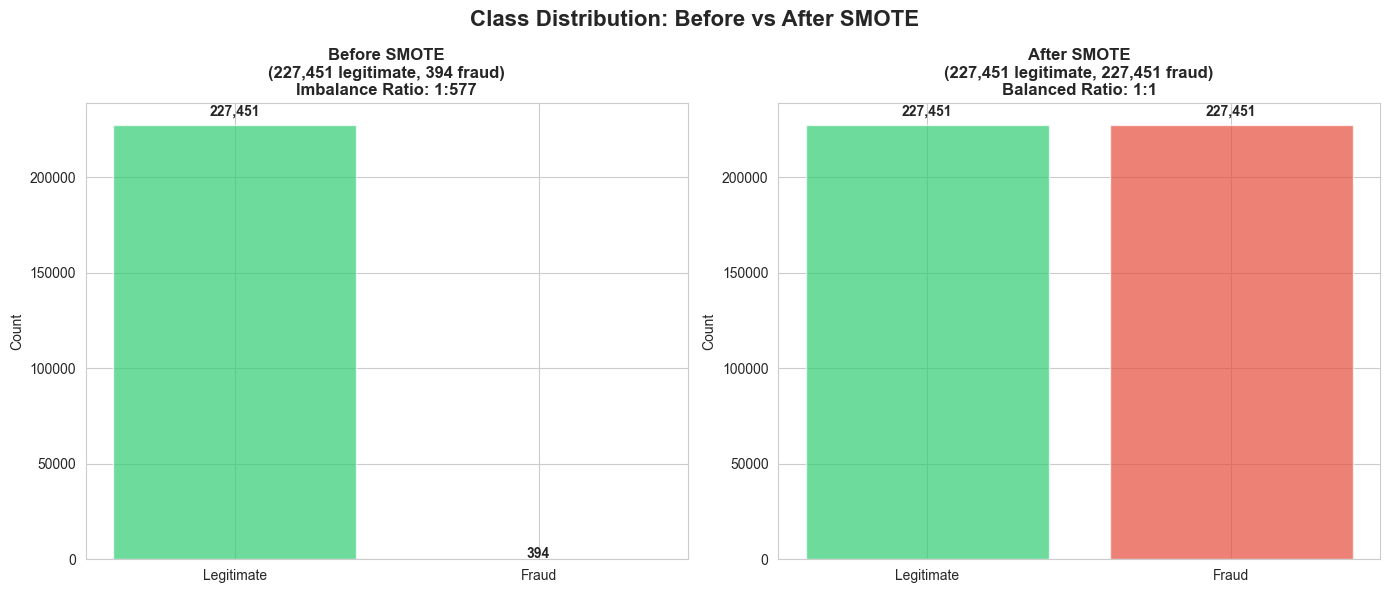


💾 Saving processed files...
   ✓ X_train.npy
   ✓ X_test.npy
   ✓ y_train.npy
   ✓ y_test.npy
   ✓ feature_names.npy  ← NEW
   ✓ scaler.pkl

📋 Preprocessing Pipeline Summary:
   1. Load Raw Data → 284,807 samples
   2. Feature Scaling → StandardScaler applied
   3. Train-Test Split → 80% train, 20% test (stratified)
   4. SMOTE Balancing → 1:1 ratio achieved
   5. Final Dataset → Ready for training


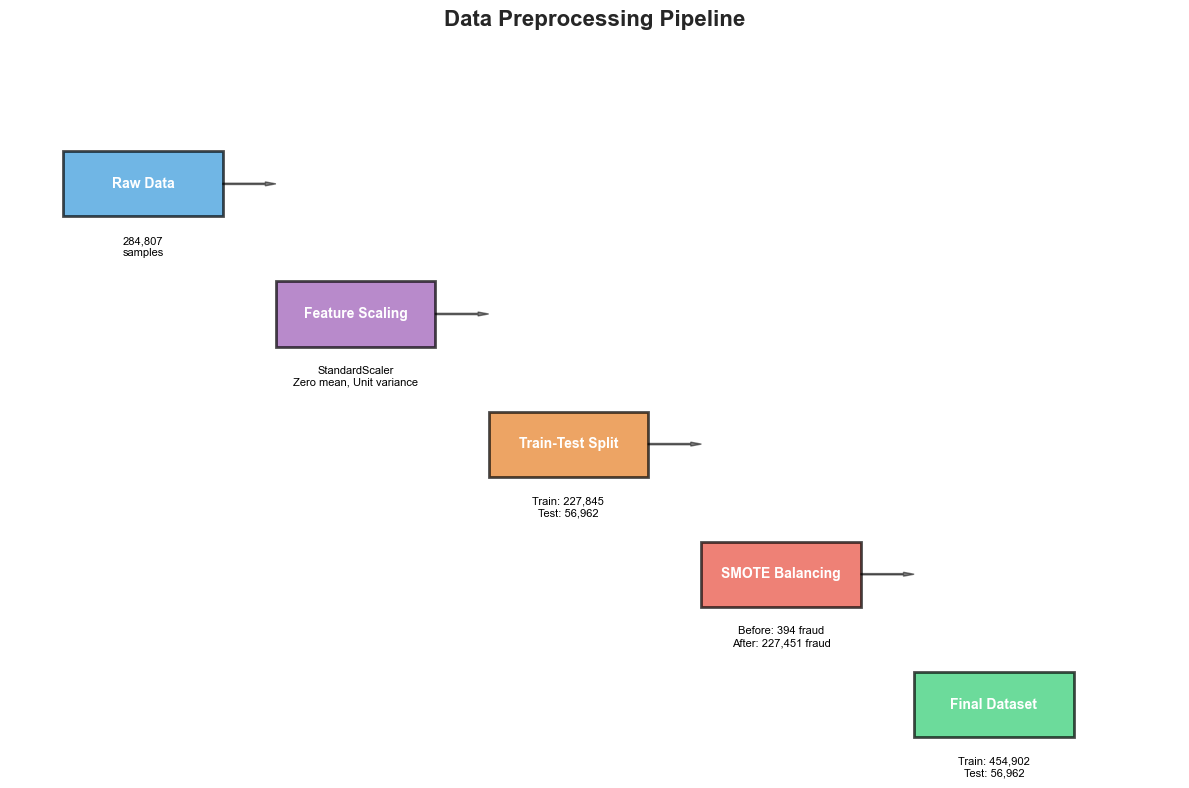


✅ DATA PREPARATION COMPLETE!

Final training set: 454,902 samples
Final test set:     56,962 samples
Visualizations saved to ../visualizations/data_prep/
Ready for model training! 🚀


In [5]:
# FraudDetectPro: Data Preparation

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import joblib
import os
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Create directory for saving plots
os.makedirs("../visualizations/data_prep", exist_ok=True)

# =====================
# 1. Setup
# =====================
print("="*60)
print("FRAUDDETECTPRO - DATA PREPARATION")
print("="*60)

# Ensure directories exist
os.makedirs("../data/processed", exist_ok=True)

# =====================
# 2. Load Raw Data
# =====================
print("\n📂 Loading raw data...")
df = pd.read_csv("../data/raw/creditcard.csv")
print(f"   Raw shape: {df.shape}")
print(f"   Features: {df.shape[1] - 1}")
print(f"   Target: Class")
print("\\n📋 Sample data (first 5 rows):")
# Display selected columns: Time, V1-V6, V26-V28, Amount, Class
selected_cols = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V26', 'V27', 'V28', 'Amount', 'Class']
display(df[selected_cols].head())

# =====================
# 2.1 Missing Values Check
# =====================
print("\n📊 Checking for missing values...")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("   ✓ No missing values found!")
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(df.columns)), [0]*len(df.columns), color='#2ecc71')
    plt.yticks(range(len(df.columns)), df.columns)
    plt.xlabel('Missing Values Count')
    plt.title('Missing Values Check - All Columns Complete', fontsize=14, fontweight='bold')
    plt.xlim(0, 1)
    for i, col in enumerate(df.columns):
        plt.text(0.1, i, f'{col}: 0', va='center', fontweight='bold', color='#27ae60', fontsize=8)
    plt.tight_layout()
    plt.savefig("../visualizations/data_prep/missing_values.png", dpi=300, bbox_inches='tight')
    plt.show()
else:
    print(f"   ⚠️ Found {missing_values.sum()} missing values")

# =====================
# 3. Separate Features and Target
# =====================
X = df.drop("Class", axis=1).values
y = df["Class"].values
feature_names = df.drop("Class", axis=1).columns.tolist()

print(f"\n📊 Dataset info:")
print(f"   Features shape: {X.shape}")
print(f"   Target shape: {y.shape}")
print(f"   Class distribution: {np.bincount(y)}")
print(f"   Fraud ratio: {y.mean()*100:.4f}%")

# =====================
# 4. Feature Scaling
# =====================
print("\n⚙️  Scaling features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"   ✓ Features scaled using StandardScaler")

# Visualize feature distribution before and after scaling
print("\n📊 Visualizing feature scaling effect...")
# Select key features to visualize
key_features = ['Amount', 'Time', 'V1', 'V2']
key_feature_indices = [df.columns.get_loc(f) for f in key_features if f in df.columns]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, (feature, feat_idx) in enumerate(zip(key_features, key_feature_indices)):
    # Before scaling
    axes[idx].hist(X[:, feat_idx], bins=50, alpha=0.7, label='Before Scaling', 
                   color='#3498db', density=True)
    # After scaling
    axes[idx].hist(X_scaled[:, feat_idx], bins=50, alpha=0.7, label='After Scaling', 
                   color='#e74c3c', density=True)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Density')
    axes[idx].set_title(f'{feature} - Before vs After Scaling', fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Feature Scaling Effect (StandardScaler)', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig("../visualizations/data_prep/scaling_effect.png", dpi=300, bbox_inches='tight')
plt.show()

# =====================
# 5. Train-Test Split (Stratified)
# =====================
print("\n🔀 Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print(f"   Train shape: {X_train.shape}, {y_train.shape}")
print(f"   Test shape:  {X_test.shape}, {y_test.shape}")
print(f"   Train fraud ratio: {y_train.mean()*100:.4f}%")
print(f"   Test fraud ratio:  {y_test.mean()*100:.4f}%")

# Visualize train-test split
print("\n📊 Visualizing train-test split...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Train set distribution
train_counts = np.bincount(y_train)
ax1.bar(['Legitimate', 'Fraud'], train_counts, color=['#2ecc71', '#e74c3c'], alpha=0.7)
ax1.set_ylabel('Count')
ax1.set_title(f'Train Set Distribution\n({train_counts[0]:,} legitimate, {train_counts[1]:,} fraud)', 
              fontweight='bold')
ax1.text(0, train_counts[0] + 5000, f'{train_counts[0]:,}', ha='center', fontweight='bold')
ax1.text(1, train_counts[1] + 500, f'{train_counts[1]:,}', ha='center', fontweight='bold')

# Test set distribution
test_counts = np.bincount(y_test)
ax2.bar(['Legitimate', 'Fraud'], test_counts, color=['#2ecc71', '#e74c3c'], alpha=0.7)
ax2.set_ylabel('Count')
ax2.set_title(f'Test Set Distribution\n({test_counts[0]:,} legitimate, {test_counts[1]:,} fraud)', 
              fontweight='bold')
ax2.text(0, test_counts[0] + 1000, f'{test_counts[0]:,}', ha='center', fontweight='bold')
ax2.text(1, test_counts[1] + 100, f'{test_counts[1]:,}', ha='center', fontweight='bold')

plt.suptitle('Stratified Train-Test Split (80-20)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig("../visualizations/data_prep/train_test_split.png", dpi=300, bbox_inches='tight')
plt.show()

# =====================
# 6. Handle Class Imbalance (SMOTE)
# =====================
print("\n🔄 Applying SMOTE...")
print(f"   Before SMOTE: {np.bincount(y_train)}")

sm = SMOTE(
    random_state=42,
    sampling_strategy=1.0,  # 1:1 ratio
    k_neighbors=5
)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(f"   After SMOTE:  {np.bincount(y_train_res)}")
print(f"   New fraud ratio: {y_train_res.mean()*100:.2f}%")
print(f"   ✓ Dataset balanced!")

# Visualize class distribution before and after SMOTE
print("\n📊 Visualizing SMOTE balancing effect...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Before SMOTE
before_counts = np.bincount(y_train)
ax1.bar(['Legitimate', 'Fraud'], before_counts, color=['#2ecc71', '#e74c3c'], alpha=0.7)
ax1.set_ylabel('Count')
ax1.set_title(f'Before SMOTE\n({before_counts[0]:,} legitimate, {before_counts[1]:,} fraud)\nImbalance Ratio: 1:{int(before_counts[0]/before_counts[1])}', 
              fontweight='bold')
ax1.text(0, before_counts[0] + 5000, f'{before_counts[0]:,}', ha='center', fontweight='bold')
ax1.text(1, before_counts[1] + 500, f'{before_counts[1]:,}', ha='center', fontweight='bold')

# After SMOTE
after_counts = np.bincount(y_train_res)
ax2.bar(['Legitimate', 'Fraud'], after_counts, color=['#2ecc71', '#e74c3c'], alpha=0.7)
ax2.set_ylabel('Count')
ax2.set_title(f'After SMOTE\n({after_counts[0]:,} legitimate, {after_counts[1]:,} fraud)\nBalanced Ratio: 1:1', 
              fontweight='bold')
ax2.text(0, after_counts[0] + 5000, f'{after_counts[0]:,}', ha='center', fontweight='bold')
ax2.text(1, after_counts[1] + 5000, f'{after_counts[1]:,}', ha='center', fontweight='bold')

plt.suptitle('Class Distribution: Before vs After SMOTE', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig("../visualizations/data_prep/smote_balancing.png", dpi=300, bbox_inches='tight')
plt.show()

# =====================
# 7. Save Processed Data
# =====================
print("\n💾 Saving processed files...")
np.save("../data/processed/X_train.npy", X_train_res)
np.save("../data/processed/X_test.npy", X_test)
np.save("../data/processed/y_train.npy", y_train_res)
np.save("../data/processed/y_test.npy", y_test)
np.save("../data/processed/feature_names.npy", feature_names)  # CRITICAL FIX
joblib.dump(scaler, "../data/processed/scaler.pkl")

print("   ✓ X_train.npy")
print("   ✓ X_test.npy")
print("   ✓ y_train.npy")
print("   ✓ y_test.npy")
print("   ✓ feature_names.npy  ← NEW")
print("   ✓ scaler.pkl")

# =====================
# 8. Preprocessing Pipeline Summary
# =====================
print("\n📋 Preprocessing Pipeline Summary:")
print("   1. Load Raw Data → 284,807 samples")
print("   2. Feature Scaling → StandardScaler applied")
print("   3. Train-Test Split → 80% train, 20% test (stratified)")
print("   4. SMOTE Balancing → 1:1 ratio achieved")
print("   5. Final Dataset → Ready for training")

# Create summary visualization
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')

# Pipeline steps
steps = [
    ('Raw Data', '284,807\nsamples', '#3498db'),
    ('Feature Scaling', 'StandardScaler\nZero mean, Unit variance', '#9b59b6'),
    ('Train-Test Split', 'Train: 227,845\nTest: 56,962', '#e67e22'),
    ('SMOTE Balancing', 'Before: 394 fraud\nAfter: 227,451 fraud', '#e74c3c'),
    ('Final Dataset', 'Train: 454,902\nTest: 56,962', '#2ecc71')
]

y_positions = [0.8, 0.6, 0.4, 0.2, 0.0]
arrow_y_positions = [0.7, 0.5, 0.3, 0.1]

for i, ((step, desc, color), y_pos) in enumerate(zip(steps, y_positions)):
    # Draw box
    rect = plt.Rectangle((i*0.2, y_pos-0.05), 0.15, 0.1, 
                         facecolor=color, edgecolor='black', linewidth=2, alpha=0.7)
    ax.add_patch(rect)
    
    # Add text
    ax.text(i*0.2 + 0.075, y_pos, step, ha='center', va='center', 
            fontweight='bold', fontsize=10, color='white')
    ax.text(i*0.2 + 0.075, y_pos - 0.08, desc, ha='center', va='top', 
            fontsize=8, color='black')
    
    # Draw arrow
    if i < len(steps) - 1:
        arrow = plt.Arrow(i*0.2 + 0.15, y_pos, 0.05, 0, width=0.01, 
                         color='black', alpha=0.5)
        ax.add_patch(arrow)

ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.1, 1.0)
ax.set_title('Data Preprocessing Pipeline', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig("../visualizations/data_prep/preprocessing_pipeline.png", dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*60)
print("✅ DATA PREPARATION COMPLETE!")
print("="*60)
print(f"\nFinal training set: {X_train_res.shape[0]:,} samples")
print(f"Final test set:     {X_test.shape[0]:,} samples")
print(f"Visualizations saved to ../visualizations/data_prep/")
print(f"Ready for model training! 🚀")